In [14]:
# Load required libraries
library(dplyr)
library(lubridate)

In [15]:
# 1. Load Data
# Ensure your CSV has columns like: 'age', 'sex', 'year_diag'
raw_data <- read.csv("data/data.csv")

In [17]:
names(raw_data)

[1] "X"                   "Sexo"                "Fecha_nac"          
 [4] "Anio_nac"            "Parr_res"            "Cant_res"           
 [7] "Activ_laboral"       "Nivel_educ"          "Establecimiento"    
[10] "Fecha_fall"          "Anio_fall"           "Fecha_diag"         
[13] "Anio_diag"           "Base_diag"           "Morf_tumor_CIEO3"   
[16] "Localiz_tumor_r"     "Fecha_ultcont"       "Anio_ultcont"       
[19] "Estado_vital"        "Num_tumores"         "Diferenc_tumor"     
[22] "Tipo_cancer_CIEO3_r" "Tipo_cancer_CIE10_r" "Nivins"             
[25] "Profesion"

In [16]:
# 2. Filter for the Study Period (1996-2019)
# We focus on the N=4,602 cohort to capture the full burden
study_data <- raw_data %>%
  filter(year_diag >= 1996 & year_diag <= 2019) %>%
  filter(age >= 18) # Focusing on adult lymphoma as per your methods

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `year_diag >= 1996 & year_diag <= 2019`.
[1mCaused by error:[22m
[33m![39m object 'year_diag' not found


In [3]:
# 3. Create Standard 5-Year Age Brackets
# This is required to calculate Age-Specific Rates (ASR)
study_data <- study_data %>%
  mutate(age_group = cut(age, 
                         breaks = c(18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, Inf),
                         labels = c("18-19", "20-24", "25-29", "30-34", "35-39", "40-44", 
                                    "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", 
                                    "75-79", "80-84", "85+"),
                         right = FALSE))

# 4. Aggregate Cases by Year and Age Group
# This table will be the foundation for the 2050 projection
annual_cases_age <- study_data %>%
  group_by(year_diag, age_group) %>%
  summarise(n_cases = n(), .groups = 'drop')

In [4]:
# 3. RUN UPDATED COX REGRESSION (Adding Tumor_Site)
final_cox_site <- coxph(Surv(OS_time, OS_status) ~ Age + Sex + Education + Establishment + Subtype + Tumor_Site, 
                        data = final_analysis_data)

# 4. PRINT TABLE
#tbl_regression(final_cox_site, exponentiate = TRUE) %>%
#  bold_p() %>%
#  bold_labels() %>%
#  add_global_p()

In [5]:
# 4. CREATE THE TABLE OBJECT
cox_table <- tbl_regression(final_cox_site, exponentiate = TRUE) %>%
  bold_p() %>%
  bold_labels() %>%
  add_global_p()

In [6]:
# 5. EXPORT TO HTML
cox_table %>%
  as_gt() %>%
  gt::gtsave("tables/Table_Cox_Regression.html")

In [7]:
# 6. EXPORT TO WORD
cox_table %>%
  as_flex_table() %>%
  # Professional styling for Word
  fontsize(size = 9, part = "all") %>%
  autofit() %>%
  save_as_docx(path = "tables/Table_Cox_Regression.docx")

<div id="pwsanudlrl" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#pwsanudlrl table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#pwsanudlrl thead, #pwsanudlrl tbody, #pwsanudlrl tfoot, #pwsanudlrl tr, #pwsanudlrl td, #pwsanudlrl th {
  border-style: none;
}

#pwsanudlrl p {
  margin: 0;
  padding: 0;
}

#pwsanudlrl .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#pwsanudlrl .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#pwsanudlrl .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#pwsanudlrl .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#pwsanudlrl .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#pwsanudlrl .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#pwsanudlrl .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#pwsanudlrl .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#pwsanudlrl .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#pwsanudlrl .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#pwsanudlrl .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#pwsanudlrl .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#pwsanudlrl .gt_spanner_row {
  border-bottom-style: hidden;
}

#pwsanudlrl .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#pwsanudlrl .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#pwsanudlrl .gt_from_md > :first-child {
  margin-top: 0;
}

#pwsanudlrl .gt_from_md > :last-child {
  margin-bottom: 0;
}

#pwsanudlrl .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#pwsanudlrl .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#pwsanudlrl .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#pwsanudlrl .gt_row_group_first td {
  border-top-width: 2px;
}

#pwsanudlrl .gt_row_group_first th {
  border-top-width: 2px;
}

#pwsanudlrl .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#pwsanudlrl .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#pwsanudlrl .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#pwsanudlrl .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#pwsanudlrl .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#pwsanudlrl .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#pwsanudlrl .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#pwsanudlrl .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#pwsanudlrl .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#pwsanudlrl .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#pwsanudlrl .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#pwsanudlrl .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#pwsanudlrl .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#pwsanudlrl .gt_left {
  text-align: left;
}

#pwsanudlrl .gt_center {
  text-align: center;
}

#pwsanudlrl .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#pwsanudlrl .gt_font_normal {
  font-weight: normal;
}

#pwsanudlrl .gt_font_bold {
  font-weight: bold;
}

#pwsanudlrl .gt_font_italic {
  font-style: italic;
}

#pwsanudlrl .gt_super {
  font-size: 65%;
}

#pwsanudlrl .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#pwsanudlrl .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#pwsanudlrl .gt_indent_1 {
  text-indent: 5px;
}

#pwsanudlrl .gt_indent_2 {
  text-indent: 10px;
}

#pwsanudlrl .gt_indent_3 {
  text-indent: 15px;
}

#pwsanudlrl .gt_indent_4 {
  text-indent: 20px;
}

#pwsanudlrl .gt_indent_5 {
  text-indent: 25px;
}

#pwsanudlrl .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#pwsanudlrl div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>
  <table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="label"><span class='gt_from_md'><strong>Characteristic</strong></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="estimate"><span class='gt_from_md'><strong>HR</strong></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="conf.low"><span class='gt_from_md'><strong>95% CI</strong></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="p.value"><span class='gt_from_md'><strong>p-value</strong></span></th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">Age</td>
<td headers="estimate" class="gt_row gt_center">1.03</td>
<td headers="conf.low" class="gt_row gt_center">1.02, 1.03</td>
<td headers="p.value" class="gt_row gt_center" style="font-weight: bold;"><0.001</td></tr>
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">Sex</td>
<td headers="estimate" class="gt_row gt_center"><br /></td>
<td headers="conf.low" class="gt_row gt_center"><br /></td>
<td headers="p.value" class="gt_row gt_center" style="font-weight: bold;"><0.001</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Female</td>
<td headers="estimate" class="gt_row gt_center">—</td>
<td headers="conf.low" class="gt_row gt_center">—</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Male</td>
<td headers="estimate" class="gt_row gt_center">1.26</td>
<td headers="conf.low" class="gt_row gt_center">1.16, 1.36</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">Education</td>
<td headers="estimate" class="gt_row gt_center"><br /></td>
<td headers="conf.low" class="gt_row gt_center"><br /></td>
<td headers="p.value" class="gt_row gt_center" style="font-weight: bold;"><0.001</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Higher (University/Technical)</td>
<td headers="estimate" class="gt_row gt_center">—</td>
<td headers="conf.low" class="gt_row gt_center">—</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Secondary</td>
<td headers="estimate" class="gt_row gt_center">1.29</td>
<td headers="conf.low" class="gt_row gt_center">1.15, 1.45</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Primary</td>
<td headers="estimate" class="gt_row gt_center">1.45</td>
<td headers="conf.low" class="gt_row gt_center">1.29, 1.63</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    None / Illiterate</td>
<td headers="estimate" class="gt_row gt_center">2.07</td>
<td headers="conf.low" class="gt_row gt_center">1.73, 2.49</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">Establishment</td>
<td headers="estimate" class="gt_row gt_center"><br /></td>
<td headers="conf.low" class="gt_row gt_center"><br /></td>
<td headers="p.value" class="gt_row gt_center" style="font-weight: bold;"><0.001</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Social Security (IESS)</td>
<td headers="estimate" class="gt_row gt_center">—</td>
<td headers="conf.low" class="gt_row gt_center">—</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Ministry of Public Health (MSP)</td>
<td headers="estimate" class="gt_row gt_center">1.28</td>
<td headers="conf.low" class="gt_row gt_center">1.14, 1.44</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Specialized Cancer Center (SOLCA)</td>
<td headers="estimate" class="gt_row gt_center">0.95</td>
<td headers="conf.low" class="gt_row gt_center">0.85, 1.05</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Private Sector</td>
<td headers="estimate" class="gt_row gt_center">0.86</td>
<td headers="conf.low" class="gt_row gt_center">0.77, 0.95</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">Subtype</td>
<td headers="estimate" class="gt_row gt_center"><br /></td>
<td headers="conf.low" class="gt_row gt_center"><br /></td>
<td headers="p.value" class="gt_row gt_center" style="font-weight: bold;"><0.001</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Diffuse Large B-Cell (DLBCL)</td>
<td headers="estimate" class="gt_row gt_center">—</td>
<td headers="conf.low" class="gt_row gt_center">—</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Follicular Lymphoma</td>
<td headers="estimate" class="gt_row gt_center">0.55</td>
<td headers="conf.low" class="gt_row gt_center">0.47, 0.65</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Hodgkin Lymphoma</td>
<td headers="estimate" class="gt_row gt_center">0.93</td>
<td headers="conf.low" class="gt_row gt_center">0.80, 1.07</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Mature T/NK-Cell</td>
<td headers="estimate" class="gt_row gt_center">1.15</td>
<td headers="conf.low" class="gt_row gt_center">1.01, 1.31</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Burkitt Lymphoma</td>
<td headers="estimate" class="gt_row gt_center">2.29</td>
<td headers="conf.low" class="gt_row gt_center">1.09, 4.83</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    B-Cell / NOS / Other</td>
<td headers="estimate" class="gt_row gt_center">0.97</td>
<td headers="conf.low" class="gt_row gt_center">0.88, 1.07</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left" style="font-weight: bold;">Tumor_Site</td>
<td headers="estimate" class="gt_row gt_center"><br /></td>
<td headers="conf.low" class="gt_row gt_center"><br /></td>
<td headers="p.value" class="gt_row gt_center">0.3</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Nodal</td>
<td headers="estimate" class="gt_row gt_center">—</td>
<td headers="conf.low" class="gt_row gt_center">—</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Gastric</td>
<td headers="estimate" class="gt_row gt_center">0.93</td>
<td headers="conf.low" class="gt_row gt_center">0.82, 1.05</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Other Extranodal</td>
<td headers="estimate" class="gt_row gt_center">1.07</td>
<td headers="conf.low" class="gt_row gt_center">0.92, 1.26</td>
<td headers="p.value" class="gt_row gt_center"><br /></td></tr>
  </tbody>
  <tfoot>
    <tr class="gt_sourcenotes">
      <td class="gt_sourcenote" colspan="4"><span class='gt_from_md'>Abbreviations: CI = Confidence Interval, HR = Hazard Ratio</span></td>
    </tr>
  </tfoot>
</table>
</div>

In [8]:
# --- 7. EXTRACT & CLEAN DATA (Adding "vs Reference") ---
forest_data <- broom::tidy(final_cox_site, exponentiate = TRUE, conf.int = TRUE) %>%
  filter(term != "(Intercept)") %>%
  mutate(
    # A. Rename columns
    HR = estimate,
    Lower = conf.low,
    Upper = conf.high,
    
    # B. Define Groups
    Variable_Group = case_when(
      str_detect(term, "Education") | str_detect(term, "Establishment") ~ "Socioeconomic & Access",
      str_detect(term, "Age") | str_detect(term, "Sex") ~ "Demographic",
      str_detect(term, "Subtype") | str_detect(term, "Tumor_Site") ~ "Clinical",
      TRUE ~ "Other"
    ),
    
    # C. Create Explicit "vs Reference" Labels
    Label = case_when(
      # Demographic
      term == "Age" ~ "Age (per year)",
      term == "SexMale" ~ "Male vs Female",
      
      # Education (Ref: Higher)
      str_detect(term, "Education") ~ paste0(str_remove(term, "Education"), " vs Higher Edu"),
      
      # Establishment (Ref: IESS) - Shorten the long MSP/SOLCA names for the plot
      str_detect(term, "Ministry of Public Health") ~ "MSP vs IESS",
      str_detect(term, "Specialized Cancer Center") ~ "SOLCA vs IESS",
      str_detect(term, "Private Sector") ~ "Private vs IESS",
      
      # Subtype (Ref: DLBCL)
      str_detect(term, "Subtype") ~ paste0(str_remove(term, "Subtype"), " vs DLBCL"),
      
      # Tumor Site (Ref: Nodal)
      str_detect(term, "Tumor_Site") ~ paste0(str_remove(term, "Tumor_Site"), " vs Nodal"),
      
      TRUE ~ term
    ),
    
    # D. Significance
    Significance = ifelse(p.value < 0.05, "Significant", "Not Significant")
  ) %>%
  mutate(
    Variable_Group = factor(Variable_Group, levels = c("Clinical", "Demographic", "Socioeconomic & Access")),
    HR_Label = paste0(sprintf("%.2f", HR), " (", sprintf("%.2f", Lower), "-", sprintf("%.2f", Upper), ")")
  )

In [9]:
# --- 8. SET EXACT ORDER (Matching your Image) ---
# Note: I updated these names to match the new "vs" labels we just created above
desired_order <- c(
  # Clinical
  "Hodgkin Lymphoma vs DLBCL", 
  "Follicular Lymphoma vs DLBCL", 
  "Mature T/NK-Cell vs DLBCL", 
  "Burkitt Lymphoma vs DLBCL", 
  "B-Cell / NOS / Other vs DLBCL", 
  "Gastric vs Nodal", 
  "Other Extranodal vs Nodal",
  
  # Demographic
  "Age (per year)", 
  "Male vs Female",
  
  # Socioeconomic & Access
  "None / Illiterate vs Higher Edu", 
  "Primary vs Higher Edu", 
  "Secondary vs Higher Edu", 
  "MSP vs IESS", 
  "SOLCA vs IESS", 
  "Private vs IESS"
)

# Apply the order
forest_data$Label <- factor(forest_data$Label, levels = rev(desired_order))

In [10]:
# --- 9. GENERATE PLOT ---
p_final <- ggplot(forest_data, aes(y = Label, x = HR, xmin = Lower, xmax = Upper, color = Significance)) +
  geom_point(size = 3.5) + 
  geom_errorbar(width = 0.2, linewidth = 0.8) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("gray50", "#E01E5A")) +
  facet_grid(Variable_Group ~ ., scales = "free_y", space = "free_y", switch = "y") +
  scale_x_log10(breaks = c(0.5, 1, 1.5, 2, 3, 4)) +
  
  labs(title = "Multivariate Analysis of Factors Associated with Lymphoma Mortality", 
       subtitle = paste0("Cox Proportional Hazards Model (Adjusted, N=", final_cox_site$n, ")"), 
       x = "Hazard Ratio (Log Scale)", 
       y = "", 
       caption = "Data Source: National Tumor Registry, Quito (1996-2019)") +
  
  theme_minimal(base_size = 18) + 
  theme(
    plot.title.position = "plot", 
    plot.title = element_text(face = "bold", hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5),
    strip.placement = "outside",
    strip.text.y.left = element_text(angle = 90, face = "bold", size = 14),
    strip.background = element_rect(fill = "gray95", color = "black", linewidth = 1),
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    plot.margin = margin(1, 1, 1, 1, "cm"),
    plot.background = element_rect(fill = "white", color = NA)
  ) +
  geom_text(aes(label = HR_Label), vjust = -0.7, size = 4.5, show.legend = FALSE, color = "black")

In [11]:
# --- 10. SAVE ---
ggsave("images/Figure3_Forest_Plot_FINAL_VS.png", plot = p_final, width = 13, height = 15, dpi = 300) 
print("Plot saved successfully.")

[1] "Plot saved successfully."


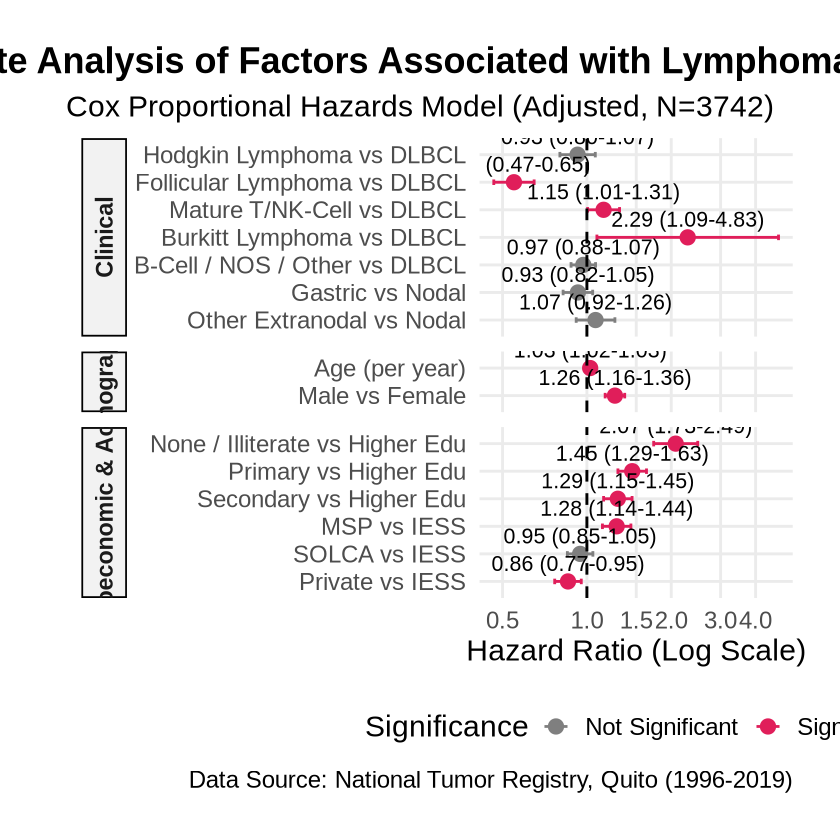

In [12]:
p_final

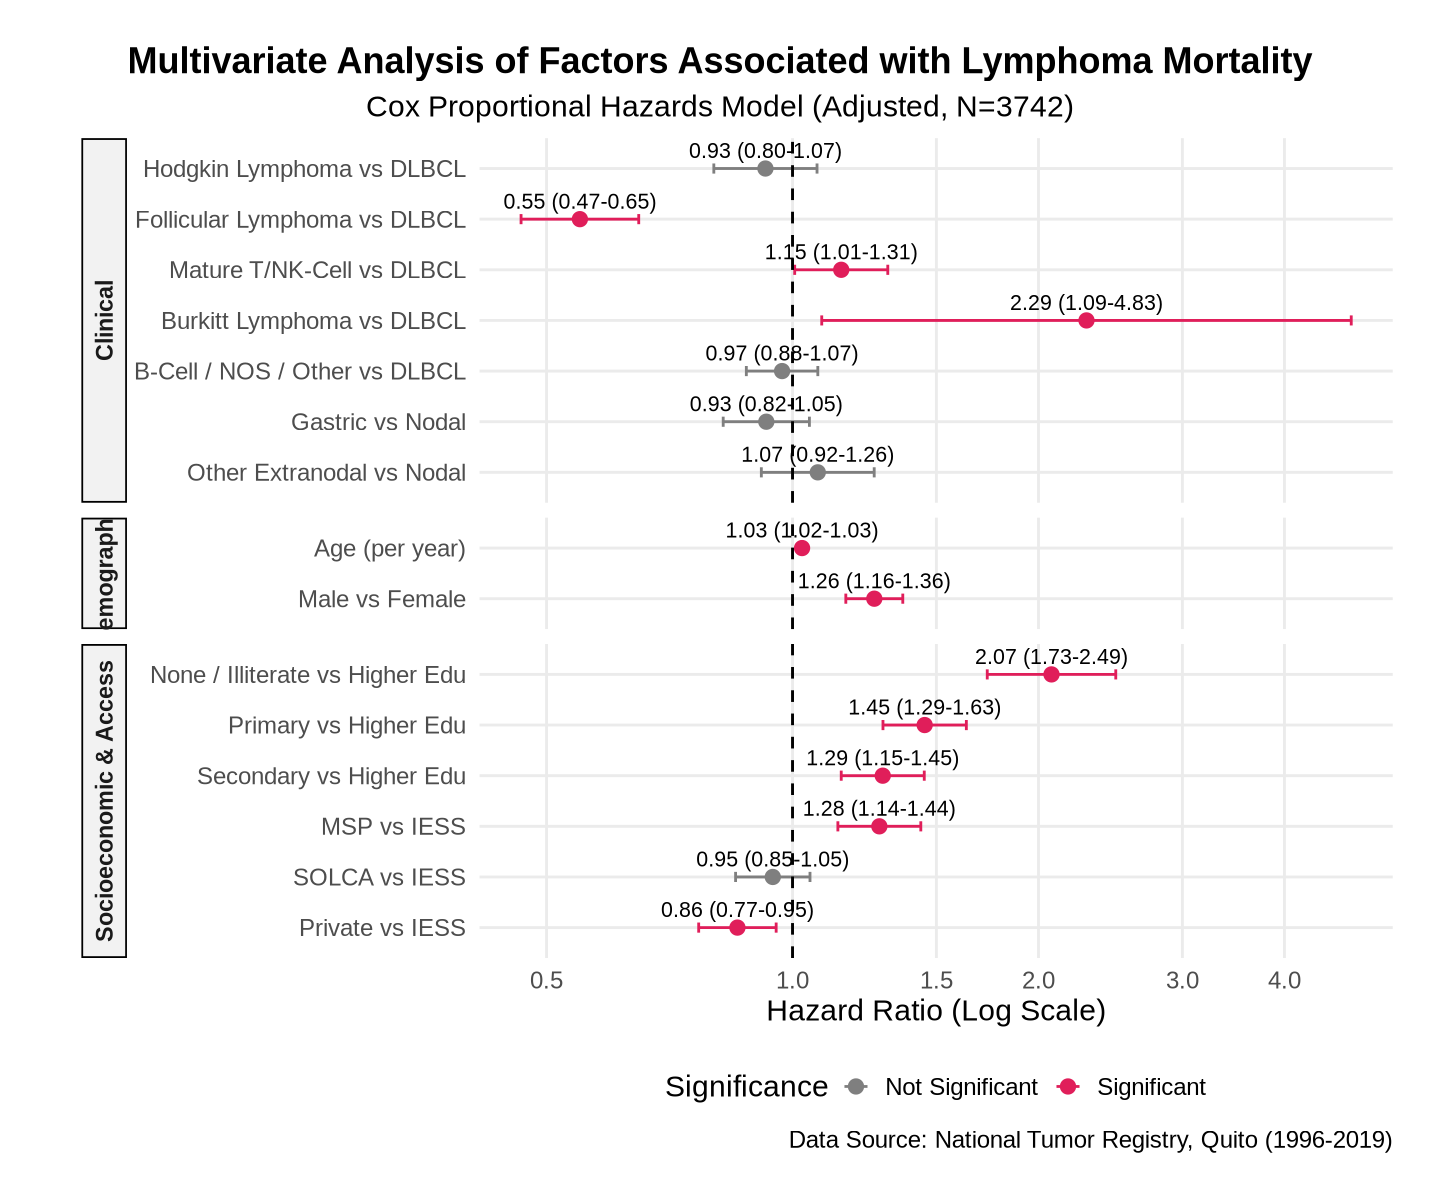

In [13]:
# print Figure

options(repr.plot.width = 12, repr.plot.height = 10)

# 2. Print the variable
p_final